<a href="https://colab.research.google.com/github/smlra-kjsce/ML-DL101/blob/master/Multi%20Layer%20Perceptron%2BFGSM%20Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Layer Perceptron
<ul>
  <li><a href="http://neuralnetworksanddeeplearning.com/chap1.html">What is a neural network</a></li>
  <li>Example</li>
 </ul>

##Importing all libraries

In [0]:
# make sure to enable GPU acceleration! == Done
device = 'cuda'

!pip3 install torch torchvision
!pip install torchviz

#Import Libraries


from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from math import pi

##Working with nested Linear Regression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch:  0
Loss:  tensor(324.6773, dtype=torch.float64, grad_fn=<MeanBackward0>)


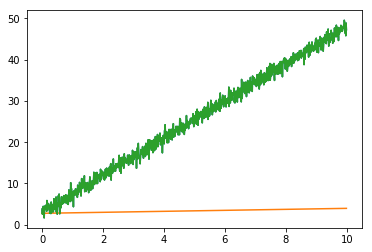

Epoch:  100
Loss:  tensor(2.7240, dtype=torch.float64, grad_fn=<MeanBackward0>)


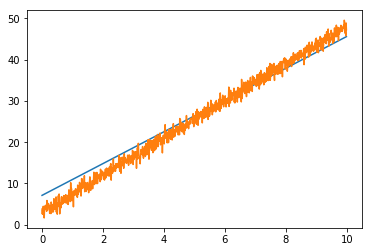

Epoch:  200
Loss:  tensor(1.7314, dtype=torch.float64, grad_fn=<MeanBackward0>)


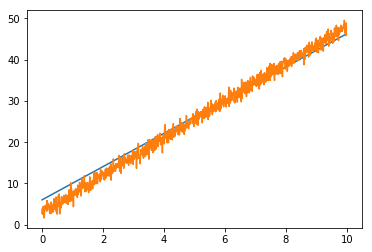

Epoch:  300
Loss:  tensor(1.2355, dtype=torch.float64, grad_fn=<MeanBackward0>)


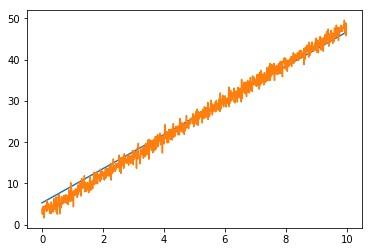

Epoch:  400
Loss:  tensor(0.9591, dtype=torch.float64, grad_fn=<MeanBackward0>)


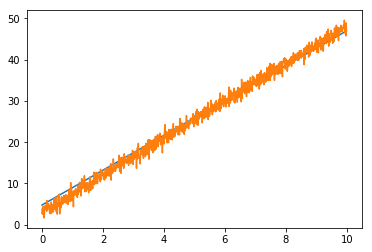

Epoch:  500
Loss:  tensor(0.7969, dtype=torch.float64, grad_fn=<MeanBackward0>)


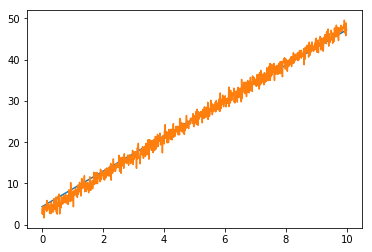

Epoch:  600
Loss:  tensor(0.6991, dtype=torch.float64, grad_fn=<MeanBackward0>)


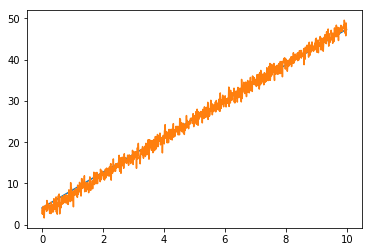

Epoch:  700
Loss:  tensor(0.6395, dtype=torch.float64, grad_fn=<MeanBackward0>)


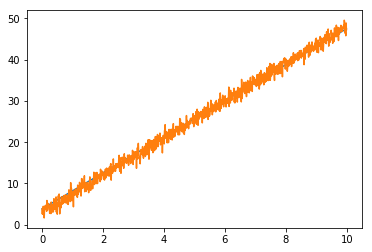

Epoch:  800
Loss:  tensor(0.6028, dtype=torch.float64, grad_fn=<MeanBackward0>)


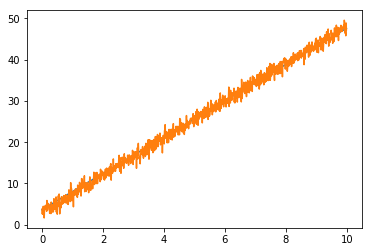

Epoch:  900
Loss:  tensor(0.5803, dtype=torch.float64, grad_fn=<MeanBackward0>)


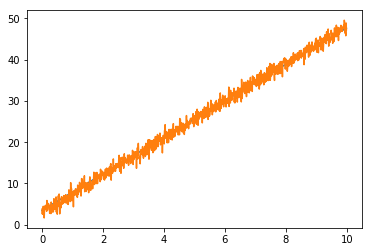

tensor(2.1953, dtype=torch.float64, requires_grad=True)
tensor(1.1683, dtype=torch.float64, requires_grad=True)
tensor(1.1669, dtype=torch.float64, requires_grad=True)
tensor(-0.3474, dtype=torch.float64, requires_grad=True)
tensor(1.2039, dtype=torch.float64, requires_grad=True)
tensor(-0.0700, dtype=torch.float64, requires_grad=True)
tensor(1.4399, dtype=torch.float64, requires_grad=True)
tensor(1.7087, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

# generating the data
x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True) # 0.9 for local minima
params[4] = c1 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)

lr = 1e-3

for epoch in range(1000):
  
  # Learning Rate Scheduling
  # lr = lr*0.999
  
  # Compute the function
  Y = params[0]*x + params[1]
  Y = params[2]*Y + params[3]
  Y = params[4]*Y + params[5]
  Y = params[6]*Y + params[7]

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.mean()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Parameters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%100==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

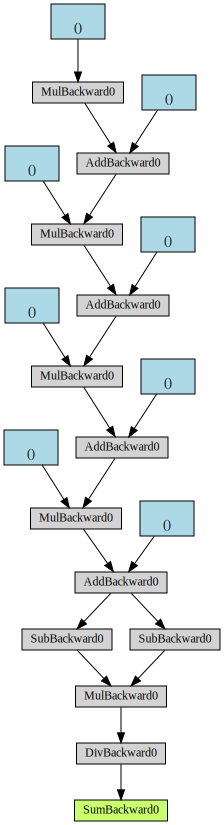

In [0]:
import torch
from torchviz import make_dot, make_dot_from_trace

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)

x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True) # 0.9 for local minima
params[4] = c1 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)

# Compute the function
Y = params[0]*x + params[1]
Y = params[2]*Y + params[3]
Y = params[4]*Y + params[5]
Y = params[6]*Y + params[7]

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum() # Computing the error

make_dot(loss)

##Nested Linear Regression for curves

Epoch:  0
Loss:  tensor(6519.0329, dtype=torch.float64, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


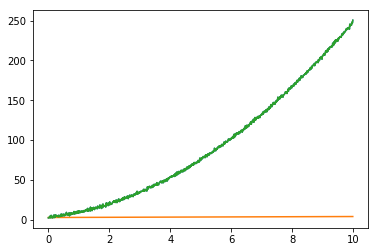

Epoch:  100
Loss:  tensor(351.2589, dtype=torch.float64, grad_fn=<MeanBackward0>)


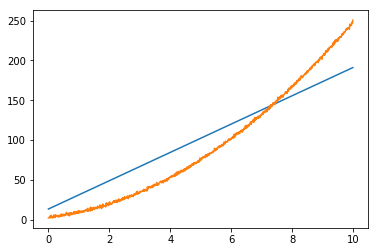

Epoch:  200
Loss:  tensor(282.7711, dtype=torch.float64, grad_fn=<MeanBackward0>)


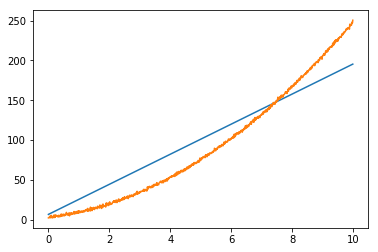

Epoch:  300
Loss:  tensor(234.7497, dtype=torch.float64, grad_fn=<MeanBackward0>)


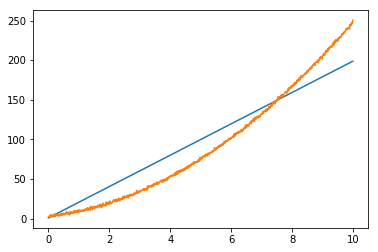

Epoch:  400
Loss:  tensor(195.4318, dtype=torch.float64, grad_fn=<MeanBackward0>)


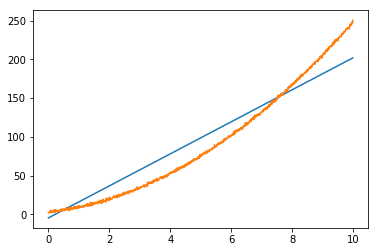

Epoch:  500
Loss:  tensor(162.2173, dtype=torch.float64, grad_fn=<MeanBackward0>)


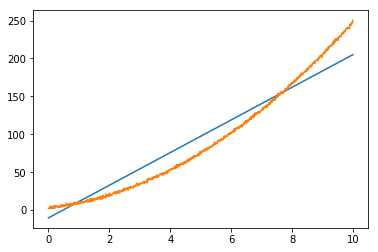

Epoch:  600
Loss:  tensor(136.5925, dtype=torch.float64, grad_fn=<MeanBackward0>)


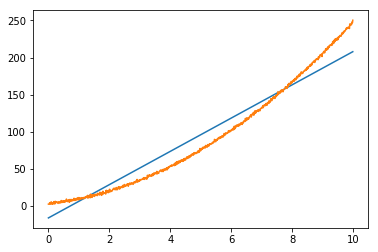

Epoch:  700
Loss:  tensor(121.0090, dtype=torch.float64, grad_fn=<MeanBackward0>)


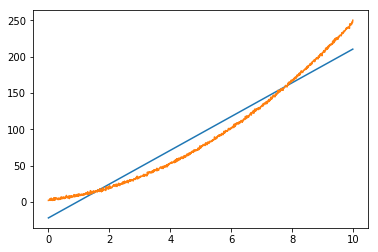

Epoch:  800
Loss:  tensor(114.4413, dtype=torch.float64, grad_fn=<MeanBackward0>)


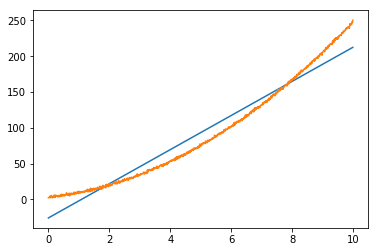

Epoch:  900
Loss:  tensor(112.5702, dtype=torch.float64, grad_fn=<MeanBackward0>)


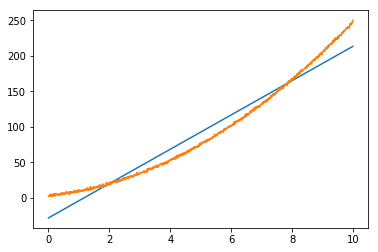

tensor(2.2147, dtype=torch.float64, requires_grad=True)
tensor(-1.7187, dtype=torch.float64, requires_grad=True)
tensor(1.7391, dtype=torch.float64, requires_grad=True)
tensor(-1.7065, dtype=torch.float64, requires_grad=True)
tensor(2.4291, dtype=torch.float64, requires_grad=True)
tensor(-0.5239, dtype=torch.float64, requires_grad=True)
tensor(2.6047, dtype=torch.float64, requires_grad=True)
tensor(1.6215, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

# generating the data
x = np.array([_/100 for _ in range(1000)])
y = 2*x*x + 4.5*x + 3 + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.3,dtype=torch.double),requires_grad=True) # 0.9 for local minima
params[4] = c1 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(0.4,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)

lr = 1e-4

for epoch in range(1000):
  
  # Learning Rate Scheduling
  # lr = lr*0.999
  
  # Compute the function
  Y = params[0]*x + params[1]
  Y = params[2]*Y + params[3]
  Y = params[4]*Y + params[5]
  Y = params[6]*Y + params[7]

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.mean()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Paramters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%100==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

##Nested Linear Regression with activation function

Epoch:  0
Loss:  tensor(309.1184, dtype=torch.float64, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


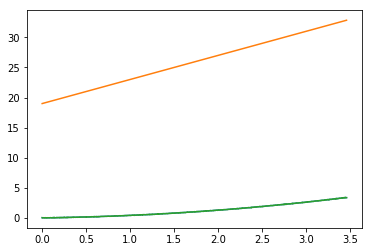

Epoch:  10000
Loss:  tensor(0.0057, dtype=torch.float64, grad_fn=<MeanBackward0>)


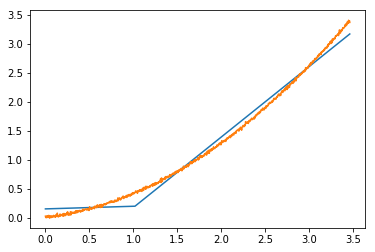

Epoch:  20000
Loss:  tensor(0.0054, dtype=torch.float64, grad_fn=<MeanBackward0>)


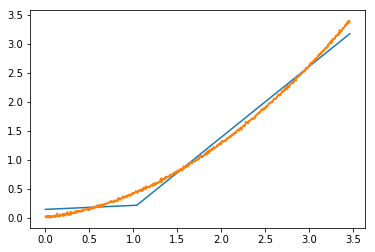

Epoch:  30000
Loss:  tensor(0.0051, dtype=torch.float64, grad_fn=<MeanBackward0>)


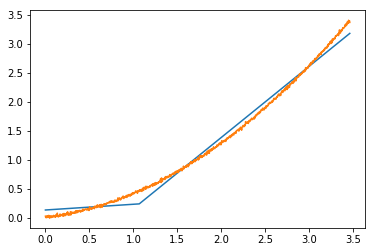

Epoch:  40000
Loss:  tensor(0.0047, dtype=torch.float64, grad_fn=<MeanBackward0>)


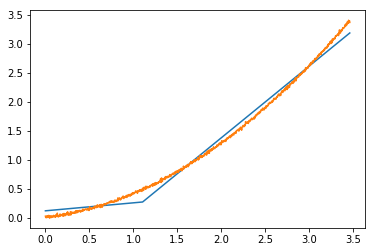

Epoch:  50000
Loss:  tensor(0.0043, dtype=torch.float64, grad_fn=<MeanBackward0>)


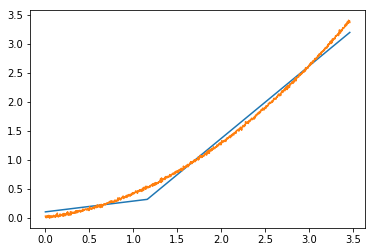

Epoch:  60000
Loss:  tensor(0.0036, dtype=torch.float64, grad_fn=<MeanBackward0>)


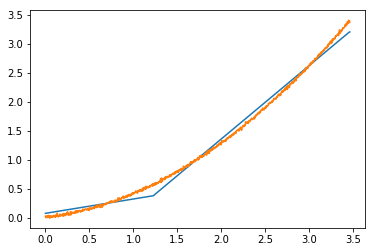

Epoch:  70000
Loss:  tensor(0.0030, dtype=torch.float64, grad_fn=<MeanBackward0>)


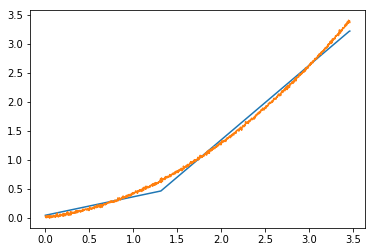

Epoch:  80000
Loss:  tensor(0.0023, dtype=torch.float64, grad_fn=<MeanBackward0>)


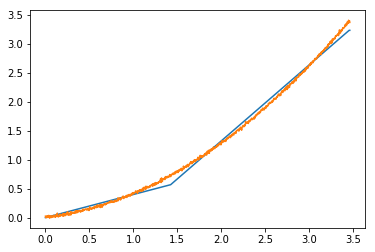

Epoch:  90000
Loss:  tensor(0.0018, dtype=torch.float64, grad_fn=<MeanBackward0>)


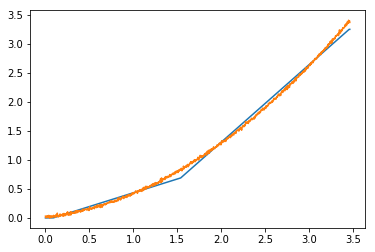

Epoch:  100000
Loss:  tensor(0.0014, dtype=torch.float64, grad_fn=<MeanBackward0>)


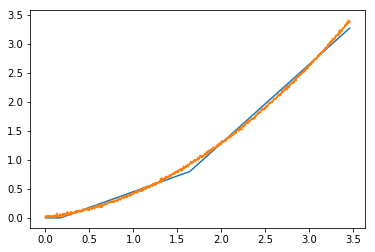

tensor(-0.5225, dtype=torch.float64, requires_grad=True)
tensor(1.8064, dtype=torch.float64, requires_grad=True)
tensor(1.1553, dtype=torch.float64, requires_grad=True)
tensor(0.0319, dtype=torch.float64, requires_grad=True)
tensor(-1.9789, dtype=torch.float64, requires_grad=True)
tensor(1.8783, dtype=torch.float64, requires_grad=True)
tensor(-0.8980, dtype=torch.float64, requires_grad=True)
tensor(0.7895, dtype=torch.float64, requires_grad=True)
tensor(1.8112, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

# generating the data
x = np.array([_/100 for _ in range(1000)])
y = 2*x*x + 4.5*x + 3 + np.random.normal(size=1000)
y = (y-np.min(y))/np.std(y)
x = (x-np.min(x))/np.std(x)

plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*9
params[0] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[3] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[4] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[5] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[6] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[8] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)

lr = 1e-2

for epoch in range(100001):
  
  # Learning Rate Scheduling
  # lr = lr*0.999
  
  # Compute the function
  Y = params[0]*x + params[1]
  Y = torch.max(Y,torch.tensor([0.0],dtype = torch.double))
  Y1 = params[2]*Y + params[3]
  Y1 = torch.max(Y1,torch.tensor([0.0],dtype = torch.double))
  Y2 = params[4]*Y + params[5]
  Y2 = torch.max(Y2,torch.tensor([0.0],dtype = torch.double))
  Y3 = params[6]*Y1 + params[7]*Y2 + params[8]
  Y3 = torch.max(Y3,torch.tensor([0.0],dtype = torch.double))
  Y = Y3

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.mean()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Paramters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%10000==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

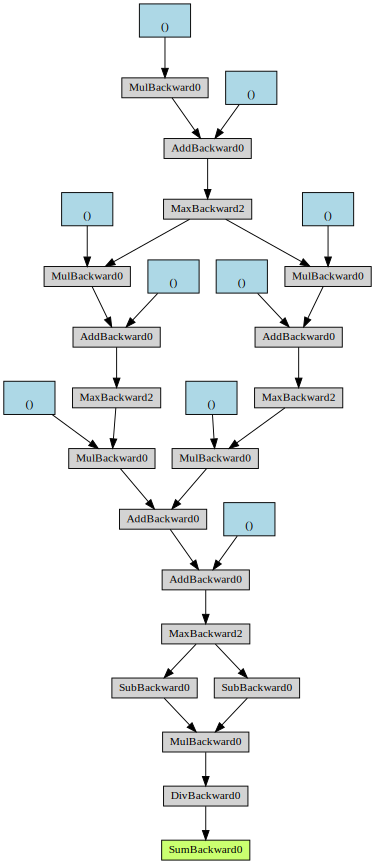

In [0]:
import torch
from torchviz import make_dot, make_dot_from_trace

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)

x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*9
params[0] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[1] = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[2] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[3] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[4] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[5] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[6] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)
params[7] = Variable(torch.tensor(3,dtype=torch.double),requires_grad=True)
params[8] = Variable(torch.tensor(1,dtype=torch.double),requires_grad=True)

lr = 1e-2

# Compute the function
Y = params[0]*x + params[1]
Y = torch.max(Y,torch.tensor([0.0],dtype = torch.double))
Y1 = params[2]*Y + params[3]
Y1 = torch.max(Y1,torch.tensor([0.0],dtype = torch.double))
Y2 = params[4]*Y + params[5]
Y2 = torch.max(Y2,torch.tensor([0.0],dtype = torch.double))
Y3 = params[6]*Y1 + params[7]*Y2 + params[8]
Y3 = torch.max(Y3,torch.tensor([0.0],dtype = torch.double))
Y = Y3
  
# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum() # Computing the error

make_dot(loss)

#Working with MNIST
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fproxy%2F0*At0wJRULTXvyA3EK.png&imgrefurl=https%3A%2F%2Fmedium.com%2F%40ashok.tankala%2Fbuild-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3&docid=AyST2t5JJTBqhM&tbnid=iBYwoLeH0wrdOM%3A&vet=10ahUKEwjOu9ie1LfkAhUb8HMBHX8iDoUQMwhnKAYwBg..i&w=495&h=494&bih=625&biw=1366&q=mnist%20images&ved=0ahUKEwjOu9ie1LfkAhUb8HMBHX8iDoUQMwhnKAYwBg&iact=mrc&uact=8">What is MNIST?</a>

##Building the model

### Adding PyTorch to this notebook

In [0]:
# make sure to enable GPU acceleration! == Done
device = 'cuda'

In [0]:
!pip3 install torch torchvision

###Importing All Needed Files

In [0]:
#Import Libraries

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

###All Paramteres for training the model

In [0]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.01 #Learning rate is how fast it will decend. 
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=True

###Downloading and pre-processing data

In [0]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)

data = datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

###Defining the model
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1632%2F1*EoxGktMmCkZXy37ydosBwQ.png&imgrefurl=https%3A%2F%2Fmedium.com%2F%40ZhengLungWu%2Fsoftmax-v-s-logsoftmax-7ce2323d32d3&docid=XhmlZfvPvHW9xM&tbnid=lgA7x9epgsz5oM%3A&vet=10ahUKEwjX3eSg1bfkAhXqILcAHepXCJIQMwhVKAwwDA..i&w=816&h=1030&bih=625&biw=1366&q=log%20softmax&ved=0ahUKEwjX3eSg1bfkAhXqILcAHepXCJIQMwhVKAwwDA&iact=mrc&uact=8">What is log-softmax</a>

In [0]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 289)
        self.fc2 = nn.Linear(289, 49)
        self.fc3 = nn.Linear(49, 10)

    def forward(self, x):
        self.x = x.view(-1,784)
        #Fully Connected Layer/Activation
        self.after_fc1 = self.fc1(self.x)
        self.after_relu1 = F.relu(self.after_fc1)
        self.after_dropout1 = F.dropout(self.after_relu1, training=self.training)
        #Fully Connected Layer/Activation
        self.after_fc2 = self.fc2(self.after_dropout1)
        self.after_relu2 = F.relu(self.after_fc2)
        self.after_dropout2 = F.dropout(self.after_relu2, training=self.training)
        self.after_fc3 = self.fc3(self.after_dropout2)
        #Softmax gets probabilities. 
        return F.log_softmax(self.after_fc3, dim=1)


###Training and Testing the Model
<a href="https://discuss.pytorch.org/t/pytorch-formula-for-nll-loss/38121">What is NLL_Loss?</a>

In [0]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable. 
        data, target = Variable(data), Variable(target)
        #This will zero out the gradients for this batch. 
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = F.nll_loss(output, target)
        # print(loss)
        #dloss/dx for every Variable 
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
            
model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300796
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.293523
Train Epoch: 1 [20000/60000 (33%)]	Loss: 2.288297
Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.290410
Train Epoch: 1 [40000/60000 (67%)]	Loss: 2.288287
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.279128


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 2.2679, Accuracy: 3184/10000 (31%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.270713
Train Epoch: 2 [10000/60000 (17%)]	Loss: 2.264497
Train Epoch: 2 [20000/60000 (33%)]	Loss: 2.264633
Train Epoch: 2 [30000/60000 (50%)]	Loss: 2.252298
Train Epoch: 2 [40000/60000 (67%)]	Loss: 2.236124
Train Epoch: 2 [50000/60000 (83%)]	Loss: 2.242987

Test set: Average loss: 2.2120, Accuracy: 3927/10000 (39%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.231472
Train Epoch: 3 [10000/60000 (17%)]	Loss: 2.207599
Train Epoch: 3 [20000/60000 (33%)]	Loss: 2.204710
Train Epoch: 3 [30000/60000 (50%)]	Loss: 2.190888
Train Epoch: 3 [40000/60000 (67%)]	Loss: 2.177167
Train Epoch: 3 [50000/60000 (83%)]	Loss: 2.153472

Test set: Average loss: 2.1177, Accuracy: 4488/10000 (44%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.125885
Train Epoch: 4 [10000/60000 (17%)]	Loss: 2.140707
Train Epoch: 4 [20000/60000 (33%)]	Loss: 2.115769
Train Epoch: 4 [30000/60000 (50%)]	Loss: 2.081756
Train Epoch: 4 [40000/60000 (67%

###Testing Using Custom Examples

tensor([[    0.0000, -3523.8135, -1903.4448, -2016.9355, -1947.5306, -1141.3330,
         -1094.9891, -2386.7839, -2132.4473, -2288.5430]], device='cuda:0')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if sys.path[0] == '':


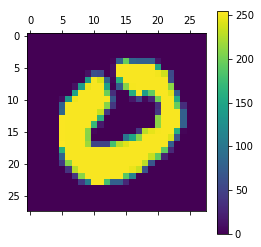

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

model.eval()
example = data.data[25]

if args['cuda']:
    model.cuda()
    example = example.cuda()

example = Variable(example,volatile=True).float()
print(model(example).data)

plt.matshow(data.data[25])
plt.colorbar()

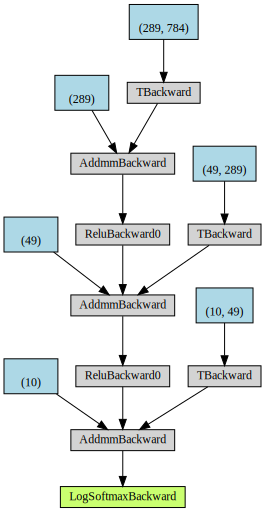

In [0]:
import torch
from torchviz import make_dot, make_dot_from_trace

make_dot(model(example))

##Visualizing all layers

###Extracting Layers

In [0]:
import numpy as np
from copy import deepcopy
all_parameters=np.array(deepcopy(list(model.parameters())))

In [0]:
# Printing Paramter Names
for i in model.named_parameters():
  print(i[0])

fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


In [0]:
for i in range(len(all_parameters)):
  all_parameters[i] = all_parameters[i].cpu().detach().numpy()

In [0]:
layer = 0
print(all_parameters[layer].shape,all_parameters[layer].size)
all_parameters[layer]

(289, 784) 226576


array([[ 0.0338448 , -0.00713428,  0.02528495, ..., -0.02738752,
         0.0127937 , -0.01463573],
       [-0.00908008, -0.01022656,  0.02238387, ..., -0.01372419,
        -0.02309431, -0.02200414],
       [-0.02529758, -0.00138616,  0.01099274, ...,  0.0113072 ,
         0.00695458, -0.01707687],
       ...,
       [-0.01670428,  0.0211595 , -0.00736611, ...,  0.02740738,
        -0.01159853,  0.02078191],
       [ 0.02677524, -0.03084917, -0.01651544, ...,  0.02893333,
         0.0066497 , -0.01100558],
       [ 0.01061546,  0.0217933 , -0.01217403, ...,  0.00658764,
         0.00126304,  0.03070698]], dtype=float32)

###Plotting the weights

Enter the Layer: 1
Enter the neuron number: 1


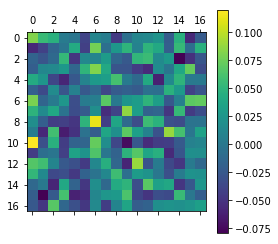

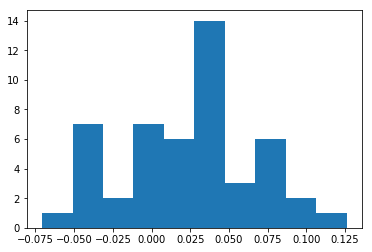

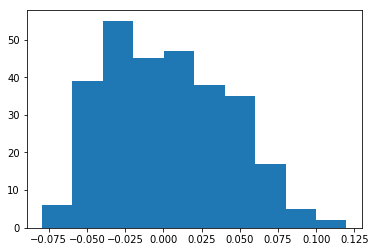

In [0]:
import matplotlib.pyplot as plt

layer =int(input('Enter the Layer: '))*2
Neuron_number = int(input('Enter the neuron number: '))

length = int(all_parameters[layer][Neuron_number].size**0.5)
plt.matshow(all_parameters[layer][Neuron_number].reshape(length,length))
plt.colorbar()
plt.show()

binwidth = 0.01

plt.hist(all_parameters[layer+1])
plt.show()

plt.hist(all_parameters[layer][Neuron_number])
plt.show()



###Visualizing Values as they pass through the model

In [0]:
# Loading the test data
data = datasets.MNIST('../data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

tensor([[ -902.7369,  -745.0264,     0.0000,  -292.4616, -1486.2119,  -626.5772,
          -140.6075, -1437.6525,  -534.0060, -1428.1917]], device='cuda:0')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if __name__ == '__main__':


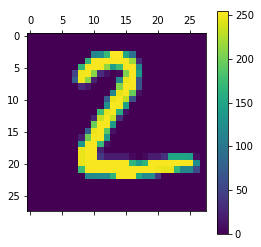

In [0]:
# Evaluating an Example
e = 1
model.train()
example = data.data[e]

if args['cuda']:
    model.cuda()
    example = example.cuda()

example = Variable(example,volatile=True).float()
print(model(example).data)

plt.matshow(data.data[e])
plt.colorbar()

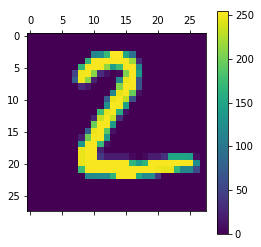

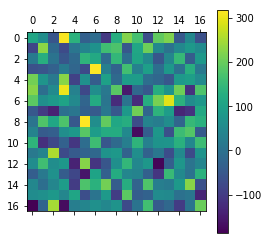

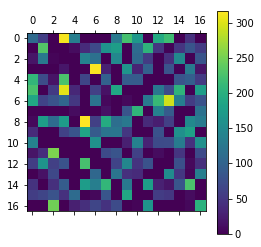

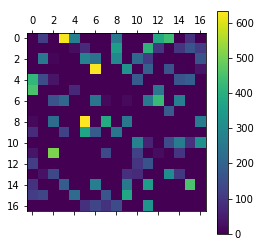

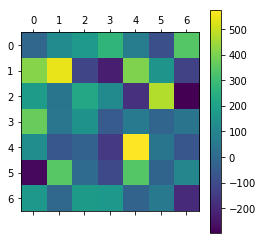

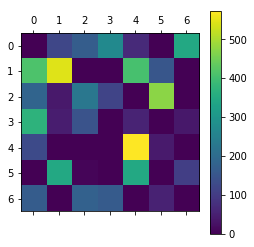

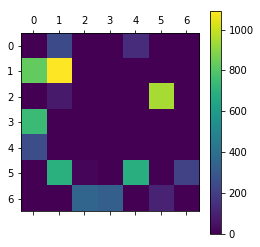

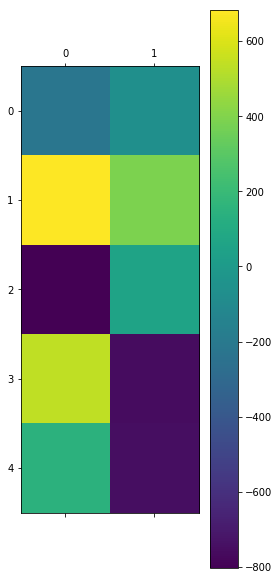

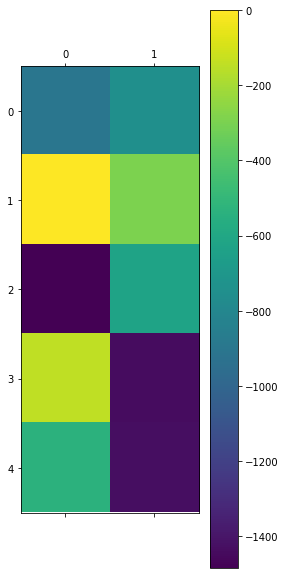

In [0]:
import numpy as np
img = plt.matshow(model.x.cpu().detach().numpy().reshape(28,28))
plt.colorbar()
plt.show()

plt.matshow(model.after_fc1.cpu().detach().numpy().reshape(17,17))
plt.colorbar()
plt.show()

plt.matshow(model.after_relu1.cpu().detach().numpy().reshape(17,17))
plt.colorbar()
plt.show()

plt.matshow(model.after_dropout1.cpu().detach().numpy().reshape(17,17))
plt.colorbar()
plt.show()

plt.matshow(model.after_fc2.cpu().detach().numpy().reshape(7,7))
plt.colorbar()
plt.show()

plt.matshow(model.after_relu2.cpu().detach().numpy().reshape(7,7))
plt.colorbar()
plt.show()

plt.matshow(model.after_dropout2.cpu().detach().numpy().reshape(7,7))
plt.colorbar()
plt.show()

plt.matshow(model.after_fc3.cpu().detach().numpy().reshape(5,2))
plt.colorbar()
plt.show()

plt.matshow(F.log_softmax(model.after_fc3, dim=1).cpu().detach().numpy().reshape(5,2))
plt.colorbar()
plt.show()

##Attributing Result to neurons and Data Points

In [0]:
# Loading the test data
data = datasets.MNIST('../data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

tensor([[    0.0000, -1976.5035, -1112.4067,  -700.0489, -1482.8152,  -378.2465,
          -928.3214, -1558.4802,  -917.9340, -1542.9077]], device='cuda:0')


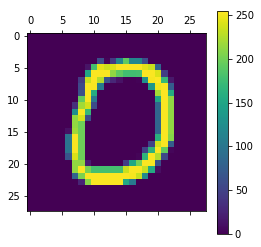

In [0]:
# Evaluating an Example
e = 10
model.eval()
example = []
example = deepcopy(data.data[e])

if args['cuda']:
    model.cuda()
    example = example.cuda()

example = Variable(example).float()
example.requires_grad=True
print(model(example).data)

plt.matshow(data.data[e])
plt.colorbar()

model.after_fc3[0][8].backward()

In [0]:
make_dot(model.after_fc3[0][4])

NameError: ignored

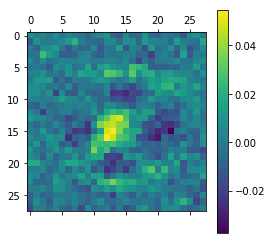

tensor([[   0.0000, -860.7466, -358.4597, -408.6072, -697.7310, -295.5039,
         -605.1486, -545.5812, -369.0107, -674.1175]], device='cuda:0')


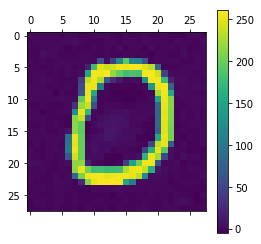

tensor([[ -728.2175,  -878.4034,  -374.4341,  -447.9939, -1018.1005,  -434.4885,
          -970.6201, -1209.8951,     0.0000,  -944.4207]], device='cuda:0')


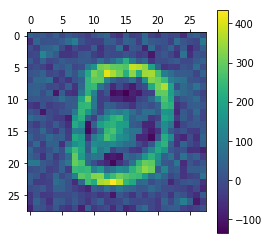

In [0]:
gradients = example.grad.cpu().detach().numpy()

plt.matshow(gradients)
plt.colorbar()
plt.show()

example1 = Variable(example+example.grad*200,requires_grad=True)
print(model(example1).data)

example_np1 = example1.cpu().detach().numpy()

plt.matshow(example_np1)
plt.colorbar()
plt.show()

example2 = Variable(example+example.grad*5000,requires_grad=True)
print(model(example2).data)

example_np2 = example2.cpu().detach().numpy()

plt.matshow(example_np2)
plt.colorbar()
plt.show()

tensor([[   0.0000, -891.3044, -390.5630, -438.9474, -720.7228, -318.8155,
         -617.7379, -547.4162, -415.3566, -690.9390]], device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device

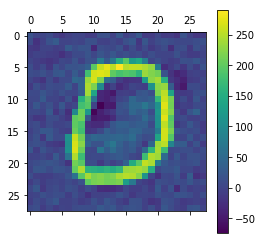

In [0]:
# performing a FGSM attack

# Evaluating an Example
e = 10
model.eval()
example = []
example = deepcopy(data.data[e])

if args['cuda']:
    model.cuda()
    example = example.cuda()

example = Variable(example).float()
example.requires_grad=True
print(model(example).data)

pi = torch.argmax(model(example).data)
print(pi)

while True:  
    example = Variable(example).float()
    example.requires_grad=True
    p = torch.argmax(model(example).data)
    print(p)
    if pi != p:
      break
    
    p = p.data.cpu().detach().numpy().tolist()
    #print(p)
    
    #plt.matshow(data.data[e])
    #plt.colorbar()

    model.after_fc3[0][5].backward()

    #gradients = example.grad.cpu().detach().numpy()

    #plt.matshow(gradients)
    #plt.colorbar()
    #plt.show()

    example = Variable(example-example.grad*10,requires_grad=True)
    #print(model(example).data)

example_np1 = example.cpu().detach().numpy()


plt.matshow(example_np1)
plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8], [1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8], [1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8], [1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8], [1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 4, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 4, 4, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 6, 6, 8, 8, 8, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 8, 1, 1, 1, 2, 2

<function matplotlib.pyplot.show>

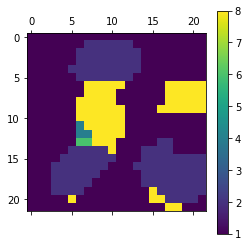

In [0]:
# moving white patch over the image
sizex = 5
sizey = 5
result = []
example = []
for x in range(28-sizex-1):
  result.append([])
  for y in range(28-sizey-1):
    # Evaluating an Example
    e = 89
    model.eval()
    example = deepcopy(data.data[e])

    for i in range(x,x+sizex):
      for j in range(y,y+sizey):
        example[i][j] = torch.max(example)

    if args['cuda']:
        model.cuda()
        example = example.cuda()

    example = Variable(example,volatile=True).float()
    prediction = model(example).data.cpu().detach().numpy().tolist()[0]
    p = prediction.index(max(prediction))
    result[-1].append(p)
    
    #plt.matshow(example.cpu())
    #plt.colorbar()
    #plt.show()
print(result)

plt.matshow(np.array(result))
plt.colorbar()
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


3


<function matplotlib.pyplot.show>

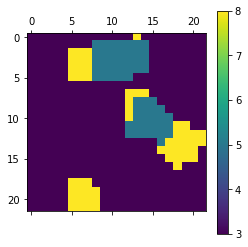

In [0]:
# moving black patch over the image
sizex = 5
sizey = 5
result = []
example = []
for x in range(28-sizex-1):
  result.append([])
  for y in range(28-sizey-1):
    # Evaluating an Example
    e = 15
    model.eval()
    example = deepcopy(data.data[e])

    for i in range(x,x+sizex):
      for j in range(y,y+sizey):
        example[i][j] = torch.min(example)

    if args['cuda']:
        model.cuda()
        example = example.cuda()

    example = Variable(example,volatile=True).float()
    prediction = model(example).data.cpu().detach().numpy().tolist()[0]
    p = prediction.index(max(prediction))
    result[-1].append(p)
    
    #plt.matshow(example.cpu())
    #plt.colorbar()
    #plt.show()
print(p)

plt.matshow(np.array(result))
plt.colorbar()
plt.show